In [32]:
# импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats as st

Описания функций:

Страна – рассматриваемая страна.

Energy_type - Тип источника энергии

Год — год записи данных.

Energy_consumption — измеренное количество потребления для конкретного источника энергии (квадратные БТЕ)

Energy_production — объем производства для конкретного источника энергии, измеренный (квадратные БТЕ)

ВВП - ВВП стран по паритету покупательной способности, измеренный (млрд долларов США по ППС 2015 г.)

Население — численность населения конкретной страны, измеренная (млн человек).

Energy_intensity_per_capita — Энергоемкость является мерой энергетической неэффективности экономики. Он рассчитывается в единицах энергии на единицу населения (душа = отдельный человек), измеряется (МБТЕ/человек).

Energy_intensity_by_GDP — Энергоемкость является мерой энергетической неэффективности экономики. Он рассчитывается как количество единиц энергии на единицу ВВП, измеренное (1000 БТЕ/доллар США 2015 года по ППС).

CO2_emission — количество выброшенного CO2, измеренное (миллионы тонн CO2)

In [33]:
df = pd.read_csv('energy.csv')
df

,Unnamed: 0,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
0,0,World,all_energy_types,1980,292.899790,296.337228,27770.910281,4.298127e+06,68.145921,10.547000,4946.627130
1,1,World,coal,1980,78.656134,80.114194,27770.910281,4.298127e+06,68.145921,10.547000,1409.790188
2,2,World,natural_gas,1980,53.865223,54.761046,27770.910281,4.298127e+06,68.145921,10.547000,1081.593377
3,3,World,petroleum_n_other_liquids,1980,132.064019,133.111109,27770.910281,4.298127e+06,68.145921,10.547000,2455.243565
4,4,World,nuclear,1980,7.575700,7.575700,27770.910281,4.298127e+06,68.145921,10.547000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
55435,55435,Zimbabwe,coal,2019,0.045064,0.075963,37.620400,1.465420e+04,11.508701,4.482962,4.586869
55436,55436,Zimbabwe,natural_gas,2019,0.000000,0.000000,37.620400,1.465420e+04,11.508701,4.482962,0.000000
55437,55437,Zimbabwe,petroleum_n_other_liquids,2019,0.055498,0.000000,37.620400,1.465420e+04,11.508701,4.482962,4.377890
55438,55438,Zimbabwe,nuclear,2019,NaN,NaN,37.620400,1.465420e+04,11.508701,4.482962,0.000000


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55440 entries, 0 to 55439
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   55440 non-null  int64  
 1   Country                      55440 non-null  object 
 2   Energy_type                  55440 non-null  object 
 3   Year                         55440 non-null  int64  
 4   Energy_consumption           44287 non-null  float64
 5   Energy_production            44289 non-null  float64
 6   GDP                          40026 non-null  float64
 7   Population                   46014 non-null  float64
 8   Energy_intensity_per_capita  50358 non-null  float64
 9   Energy_intensity_by_GDP      50358 non-null  float64
 10  CO2_emission                 51614 non-null  float64
dtypes: float64(7), int64(2), object(2)
memory usage: 4.7+ MB


In [35]:
df.columns = df.columns.str.lower()

In [36]:
df = df.loc[df['year'] == 2019]
df = df.loc[df['country'] != 'World']
df

,unnamed: 0,country,energy_type,year,energy_consumption,energy_production,gdp,population,energy_intensity_per_capita,energy_intensity_by_gdp,co2_emission
54060,54060,Afghanistan,all_energy_types,2019,0.122748,0.055210,79.4546,38050.9,3.225901,1.544888,9.391163
54061,54061,Afghanistan,coal,2019,0.044564,0.042336,79.4546,38050.9,3.225901,1.544888,4.752619
54062,54062,Afghanistan,natural_gas,2019,0.005039,0.005039,79.4546,38050.9,3.225901,1.544888,0.318252
54063,54063,Afghanistan,petroleum_n_other_liquids,2019,0.048550,0.000000,79.4546,38050.9,3.225901,1.544888,4.320292
54064,54064,Afghanistan,nuclear,2019,NaN,NaN,79.4546,38050.9,3.225901,1.544888,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
55435,55435,Zimbabwe,coal,2019,0.045064,0.075963,37.6204,14654.2,11.508701,4.482962,4.586869
55436,55436,Zimbabwe,natural_gas,2019,0.000000,0.000000,37.6204,14654.2,11.508701,4.482962,0.000000
55437,55437,Zimbabwe,petroleum_n_other_liquids,2019,0.055498,0.000000,37.6204,14654.2,11.508701,4.482962,4.377890
55438,55438,Zimbabwe,nuclear,2019,NaN,NaN,37.6204,14654.2,11.508701,4.482962,0.000000


Возьмем только данные за 2019 год и исключим общую информацию по миру из рассмотрения, так как она будет искажать уравнение

In [37]:
df[df.duplicated()].count()

unnamed: 0                     0
country                        0
energy_type                    0
year                           0
energy_consumption             0
energy_production              0
gdp                            0
population                     0
energy_intensity_per_capita    0
energy_intensity_by_gdp        0
co2_emission                   0
dtype: int64

Дубликатов в данных нет

In [38]:
df.isnull().sum()

unnamed: 0                       0
country                          0
energy_type                      0
year                             0
energy_consumption             235
energy_production              233
gdp                            180
population                     162
energy_intensity_per_capita     72
energy_intensity_by_gdp         72
co2_emission                    32
dtype: int64

Есть пропущенные значения в данных. Пропущенные значения по столбцам Energy_consumption и Energy_production можно объяснить тем, что страна либо вообще не производит определенный вид энергии, либо же его не потребляет. В таком случае заменим пропущенные значения на 0

In [39]:
df['energy_consumption'] = df['energy_consumption'].fillna(0)
df['energy_production'] = df['energy_production'].fillna(0)

In [40]:
df['country'].nunique()

230

Всего в данных 230 стран

In [41]:
df_1 = df.loc[df['gdp'].isnull() == True] 
df_1['country'].unique()

array(['American Samoa', 'Antarctica', 'Cook Islands', 'Falkland Islands',
       'Faroe Islands', 'Former Czechoslovakia',
       'Former Serbia and Montenegro', 'Former U.S.S.R.',
       'Former Yugoslavia', 'French Guiana', 'French Polynesia',
       'Germany, East', 'Germany, West', 'Gibraltar', 'Guam',
       'Hawaiian Trade Zone', 'Micronesia', 'Montserrat', 'Nauru',
       'New Caledonia', 'Niue', 'Northern Mariana Islands',
       'Saint Helena', 'Saint Pierre and Miquelon',
       'Turks and Caicos Islands', 'Tuvalu', 'U.S. Pacific Islands',
       'U.S. Territories', 'Wake Island', 'Western Sahara'], dtype=object)

Проверим, у каких стран отсутствуют данные ВВП, численности населения (у 30 стран нет данных по ВВП и у 27 стран нет данных по численности населения)

In [42]:
df_1 = df.loc[df['population'].isnull() == True] 
df_1['country'].unique()

array(['Antarctica', 'Cook Islands', 'Falkland Islands', 'Faroe Islands',
       'Former Czechoslovakia', 'Former Serbia and Montenegro',
       'Former U.S.S.R.', 'Former Yugoslavia', 'French Guiana',
       'French Polynesia', 'Germany, East', 'Germany, West', 'Gibraltar',
       'Hawaiian Trade Zone', 'Micronesia', 'Montserrat', 'Nauru',
       'New Caledonia', 'Niue', 'Saint Helena',
       'Saint Pierre and Miquelon', 'Turks and Caicos Islands', 'Tuvalu',
       'U.S. Pacific Islands', 'U.S. Territories', 'Wake Island',
       'Western Sahara'], dtype=object)

Заметно, что в обоих случаях список стран очень похож, значит просто в данном датасете отсутсвуют даннные по этим странам по ВВП и численности населения, удалим их из рассмотрения

In [43]:
df = df.dropna()

In [44]:
df.isnull().sum()

unnamed: 0                     0
country                        0
energy_type                    0
year                           0
energy_consumption             0
energy_production              0
gdp                            0
population                     0
energy_intensity_per_capita    0
energy_intensity_by_gdp        0
co2_emission                   0
dtype: int64

In [45]:
df

,unnamed: 0,country,energy_type,year,energy_consumption,energy_production,gdp,population,energy_intensity_per_capita,energy_intensity_by_gdp,co2_emission
54060,54060,Afghanistan,all_energy_types,2019,0.122748,0.055210,79.4546,38050.9,3.225901,1.544888,9.391163
54061,54061,Afghanistan,coal,2019,0.044564,0.042336,79.4546,38050.9,3.225901,1.544888,4.752619
54062,54062,Afghanistan,natural_gas,2019,0.005039,0.005039,79.4546,38050.9,3.225901,1.544888,0.318252
54063,54063,Afghanistan,petroleum_n_other_liquids,2019,0.048550,0.000000,79.4546,38050.9,3.225901,1.544888,4.320292
54064,54064,Afghanistan,nuclear,2019,0.000000,0.000000,79.4546,38050.9,3.225901,1.544888,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
55435,55435,Zimbabwe,coal,2019,0.045064,0.075963,37.6204,14654.2,11.508701,4.482962,4.586869
55436,55436,Zimbabwe,natural_gas,2019,0.000000,0.000000,37.6204,14654.2,11.508701,4.482962,0.000000
55437,55437,Zimbabwe,petroleum_n_other_liquids,2019,0.055498,0.000000,37.6204,14654.2,11.508701,4.482962,4.377890
55438,55438,Zimbabwe,nuclear,2019,0.000000,0.000000,37.6204,14654.2,11.508701,4.482962,0.000000


В результате предобработки данных и рассмотрении только 2019 года осталось 1170 наблюдений

In [46]:
df['energy_type'].unique()

array(['all_energy_types', 'coal', 'natural_gas',
       'petroleum_n_other_liquids', 'nuclear', 'renewables_n_other'],
      dtype=object)

Всего данные дают информацию о 5 видах энергии, но так как цель работы - рассмотреть влияние определенного ресурса на выброс CO2, возьмем в качестве источника энергии уголь

In [47]:
df = df.loc[df['energy_type'] == 'coal']
df

,unnamed: 0,country,energy_type,year,energy_consumption,energy_production,gdp,population,energy_intensity_per_capita,energy_intensity_by_gdp,co2_emission
54061,54061,Afghanistan,coal,2019,0.044564,0.042336,79.45460,38050.9000,3.225901,1.544888,4.752619
54067,54067,Albania,coal,2019,0.002494,0.000089,38.26840,2879.9200,38.455319,2.893987,0.204336
54073,54073,Algeria,coal,2019,0.000405,0.000000,509.06600,43030.4000,61.433374,5.192849,0.232647
54085,54085,Angola,coal,2019,0.000000,0.000000,193.82600,31849.8000,11.693253,1.921454,0.000000
54097,54097,Antigua and Barbuda,coal,2019,0.000000,0.000000,2.12893,97.0566,107.154033,4.885086,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
55399,55399,Venezuela,coal,2019,0.001117,0.012014,190.14720,28515.8500,85.828574,12.871474,0.127186
55405,55405,Vietnam,coal,2019,1.647620,1.202316,915.50400,96425.9000,36.391525,3.832955,159.987205
55423,55423,Yemen,coal,2019,0.000851,0.000000,53.08380,29162.2000,5.452938,2.995635,0.221373
55429,55429,Zambia,coal,2019,0.034151,0.024538,247.18190,17873.8500,11.586567,0.837831,2.894102


В результате получили 195 наблюдений, теперь посмотрим на выбросы. Если удалять выбросы используя межквартильный размах, то наблюдений останется очень мало. Кроме того, удалять еще больше стран из рассмотрения не совсем верно, так как нас интересует информация в целом по миру, поэтому посмотрим, какие именно страны показывают выбросы и связано ли это с их уровнем развития

,unnamed: 0,country,energy_type,year,energy_consumption,energy_production,gdp,population,energy_intensity_per_capita,energy_intensity_by_gdp,co2_emission
54301,54301,China,coal,2019,91.364828,87.634713,23128.34,1434512.0,105.686733,6.555113,8546.287450
54649,54649,India,coal,2019,16.265289,11.666316,9310.29,1368140.0,23.230619,3.413722,1589.042006


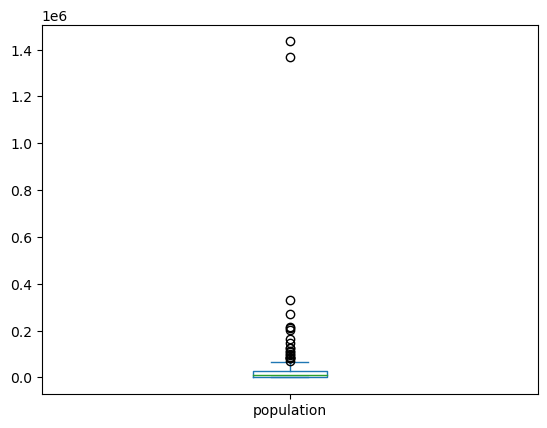

In [48]:
df['population'].plot.box()
df.loc[df['population'] > 1200000]

,unnamed: 0,country,energy_type,year,energy_consumption,energy_production,gdp,population,energy_intensity_per_capita,energy_intensity_by_gdp,co2_emission
54301,54301,China,coal,2019,91.364828,87.634713,23128.34,1434512.0,105.686733,6.555113,8546.287450
54649,54649,India,coal,2019,16.265289,11.666316,9310.29,1368140.0,23.230619,3.413722,1589.042006
55375,55375,United States,coal,2019,11.315595,14.255763,19925.43,330043.8,304.305271,5.040497,1262.555409


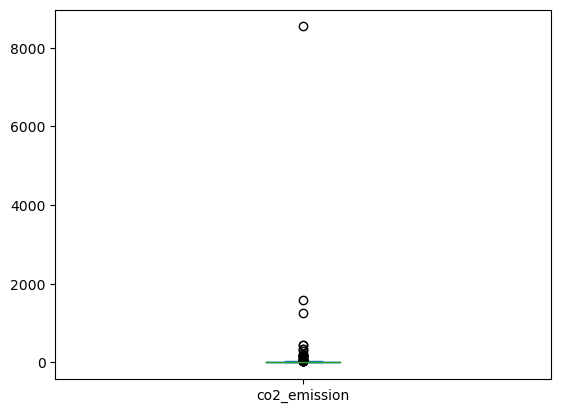

In [49]:
df['co2_emission'].plot.box()
df.loc[df['co2_emission'] > 1000]

,unnamed: 0,country,energy_type,year,energy_consumption,energy_production,gdp,population,energy_intensity_per_capita,energy_intensity_by_gdp,co2_emission
54301,54301,China,coal,2019,91.364828,87.634713,23128.34,1434512.0,105.686733,6.555113,8546.287450
54649,54649,India,coal,2019,16.265289,11.666316,9310.29,1368140.0,23.230619,3.413722,1589.042006
55375,55375,United States,coal,2019,11.315595,14.255763,19925.43,330043.8,304.305271,5.040497,1262.555409


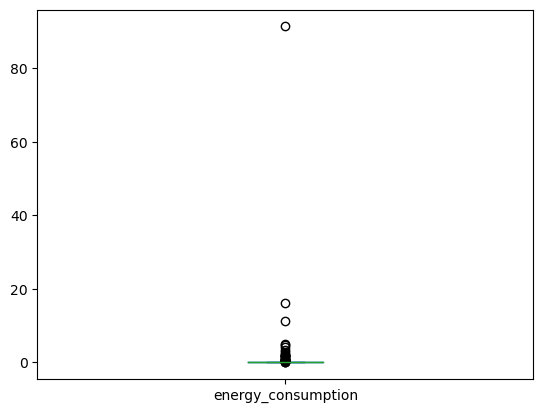

In [50]:
df['energy_consumption'].plot.box()
df.loc[df['energy_consumption'] > 10]

Видно, что основные самые экстремальные выбросы наблюдаются по странам Китай, Индия и США, что связано с их высокой численностью населения и интенсивным производством по сравнению с другими странами, поэтому исключим их из анализа

In [52]:
df = df.loc[(df['country'] != 'China') & (df['country'] != 'India') & (df['country'] != 'United States')]
df

,unnamed: 0,country,energy_type,year,energy_consumption,energy_production,gdp,population,energy_intensity_per_capita,energy_intensity_by_gdp,co2_emission
54061,54061,Afghanistan,coal,2019,0.044564,0.042336,79.45460,38050.9000,3.225901,1.544888,4.752619
54067,54067,Albania,coal,2019,0.002494,0.000089,38.26840,2879.9200,38.455319,2.893987,0.204336
54073,54073,Algeria,coal,2019,0.000405,0.000000,509.06600,43030.4000,61.433374,5.192849,0.232647
54085,54085,Angola,coal,2019,0.000000,0.000000,193.82600,31849.8000,11.693253,1.921454,0.000000
54097,54097,Antigua and Barbuda,coal,2019,0.000000,0.000000,2.12893,97.0566,107.154033,4.885086,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
55399,55399,Venezuela,coal,2019,0.001117,0.012014,190.14720,28515.8500,85.828574,12.871474,0.127186
55405,55405,Vietnam,coal,2019,1.647620,1.202316,915.50400,96425.9000,36.391525,3.832955,159.987205
55423,55423,Yemen,coal,2019,0.000851,0.000000,53.08380,29162.2000,5.452938,2.995635,0.221373
55429,55429,Zambia,coal,2019,0.034151,0.024538,247.18190,17873.8500,11.586567,0.837831,2.894102


In [53]:
corr_matrix = df.corr()
corr_matrix

C:\Users\Elizaveta\AppData\Local\Temp\ipykernel_2024\2355143037.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


,unnamed: 0,year,energy_consumption,energy_production,gdp,population,energy_intensity_per_capita,energy_intensity_by_gdp,co2_emission
unnamed: 0,1.000000,NaN,0.126914,-0.014467,0.067605,0.032664,0.036529,0.125123,0.125521
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
energy_consumption,0.126914,NaN,1.000000,0.634007,0.714951,0.483409,0.149062,0.152833,0.993732
energy_production,-0.014467,NaN,0.634007,1.000000,0.400886,0.402610,0.103649,0.131703,0.598395
gdp,0.067605,NaN,0.714951,0.400886,1.000000,0.687131,0.212168,0.068659,0.745978
population,0.032664,NaN,0.483409,0.402610,0.687131,1.000000,-0.091288,-0.055723,0.474877
energy_intensity_per_capita,0.036529,NaN,0.149062,0.103649,0.212168,-0.091288,1.000000,0.550000,0.161564
energy_intensity_by_gdp,0.125123,NaN,0.152833,0.131703,0.068659,-0.055723,0.550000,1.000000,0.148244
co2_emission,0.125521,NaN,0.993732,0.598395,0.745978,0.474877,0.161564,0.148244,1.000000


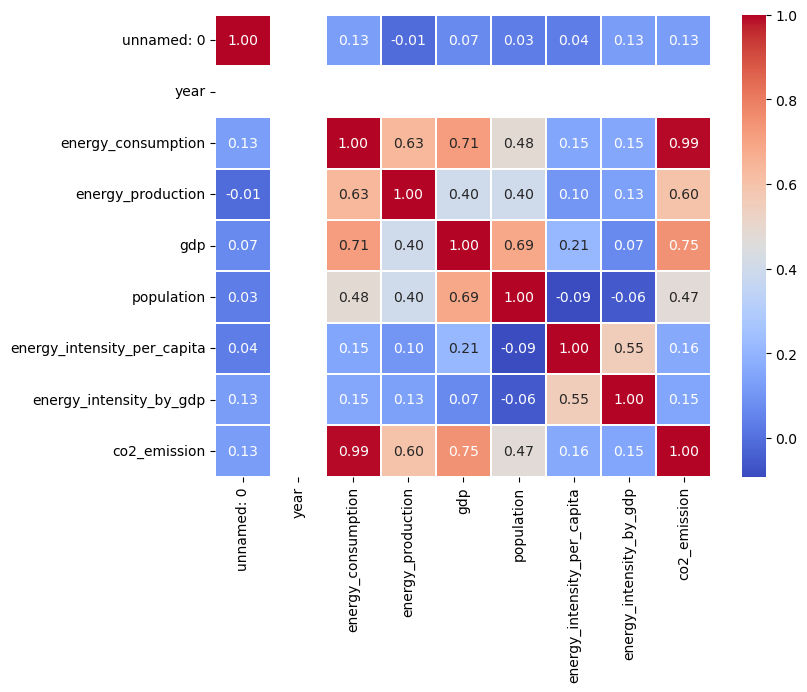

In [54]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=.3)
plt.show()

Осталось 192 наблюдения, посмотрели их матрицу корреляции

### 1. Выбрать факторы

Зависимый фактор - CO2_emission

Независимые переменные (выбрала те, где связь между факторами и результатом наиболее тесная):

    1. Energy_consumption (r=0.99)
    2. Energy_production (r=0.60)
    2. GDP (r=0.75)

In [55]:
df_1 = df[['country','co2_emission', 'energy_consumption', 'energy_production', 'gdp']]

In [56]:
matrix_corr_1 = df_1.corr()
matrix_corr_1

C:\Users\Elizaveta\AppData\Local\Temp\ipykernel_2024\2396592637.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix_corr_1 = df_1.corr()


,co2_emission,energy_consumption,energy_production,gdp
co2_emission,1.000000,0.993732,0.598395,0.745978
energy_consumption,0.993732,1.000000,0.634007,0.714951
energy_production,0.598395,0.634007,1.000000,0.400886
gdp,0.745978,0.714951,0.400886,1.000000


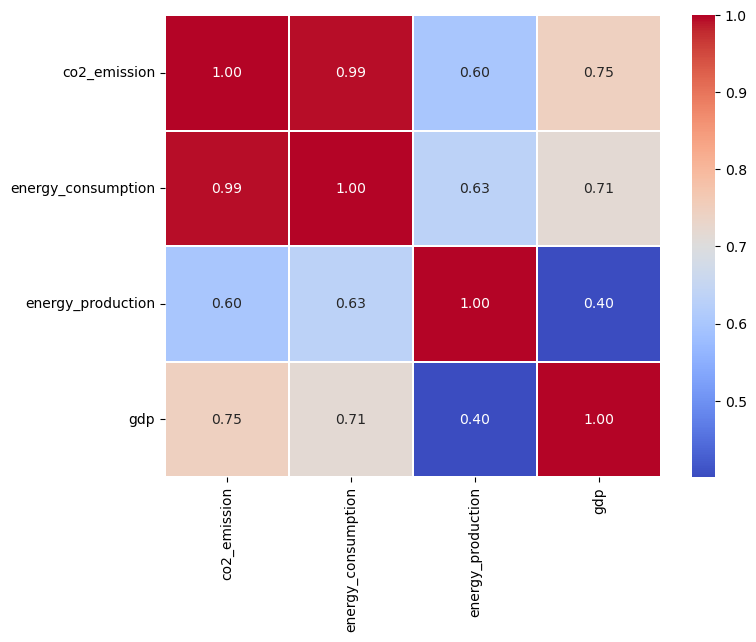

In [58]:
plt.figure(figsize=(8, 6))
sns.heatmap(matrix_corr_1, annot=True, fmt='.2f', cmap='coolwarm', linewidths=.3)
plt.show()

Наблюдается коллинеарность между факторами Energy_consumption и GDP. Так как фактор Energy_production меньше кореллирует с фактором GDP (0,4 < 0,63), оставляем факторы Energy_production и GDP 

In [59]:
df_1 = df[['country','co2_emission', 'gdp', 'energy_production']]

<Axes: xlabel='gdp', ylabel='co2_emission'>

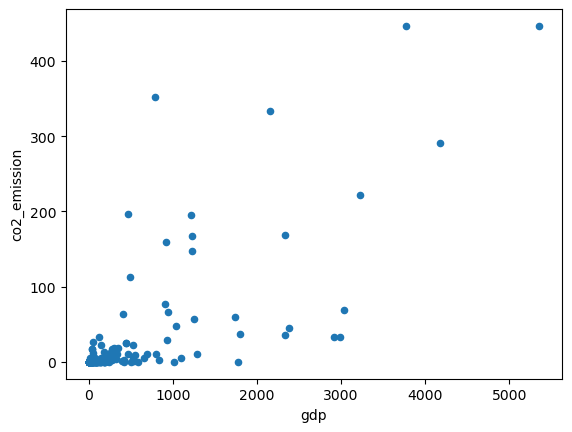

In [60]:
df_1.plot(kind='scatter', x='gdp', y='co2_emission')

<Axes: xlabel='energy_production', ylabel='co2_emission'>

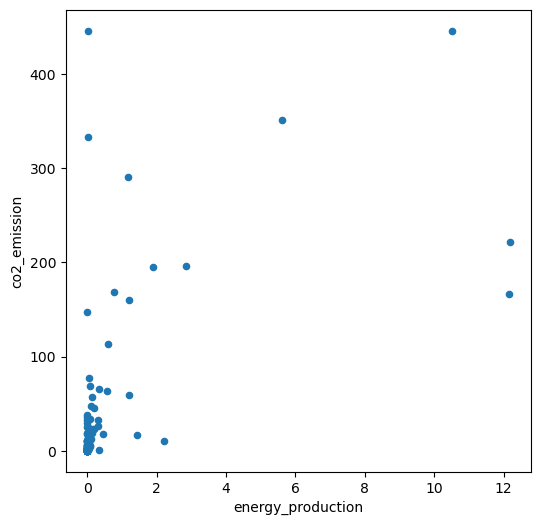

In [63]:
df_1.plot(kind='scatter', x='energy_production', y='co2_emission')

C:\Users\Elizaveta\AppData\Local\Temp\ipykernel_2024\1178905708.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_1['co2_emission']).set(title='Функция плотности выбросов углерода', xlabel='Выручка', ylabel='Плотность распределения')


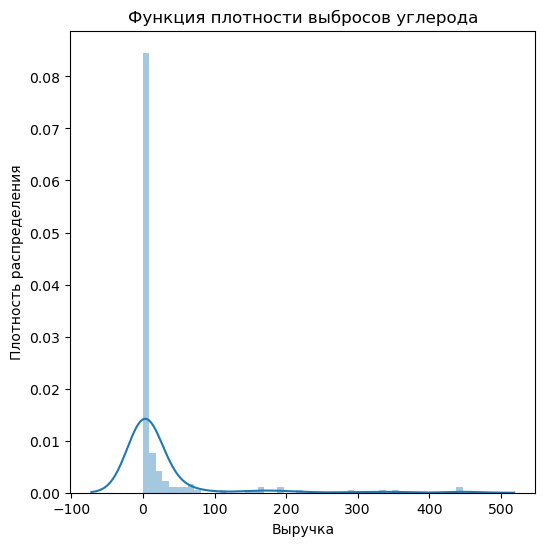

In [64]:
plt.rcParams['figure.figsize']=6,6
sns.distplot(df_1['co2_emission']).set(title='Функция плотности выбросов углерода', xlabel='Выручка', ylabel='Плотность распределения')
plt.show()

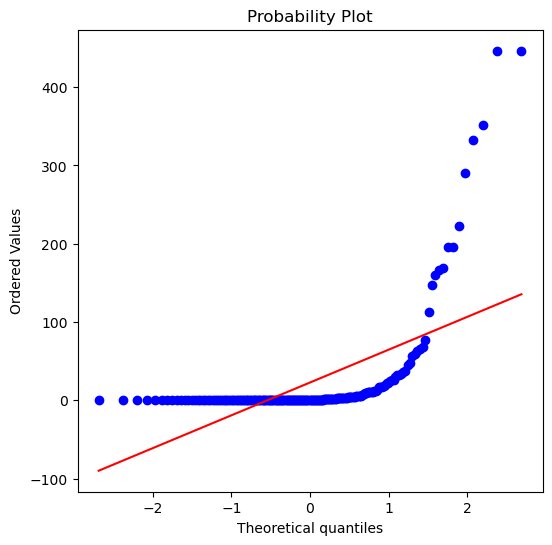

In [65]:
plt.figure(figsize=(6, 6))
st.probplot(df_1['co2_emission'], dist='norm', plot=plt)
plt.show()

### 2. Оценить параметры уравнения множественной регрессии.

In [66]:
from statsmodels.formula.api import ols

In [67]:
model = ols('co2_emission ~ gdp + energy_production', data = df_1)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           co2_emission   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     186.1
Date:                Mon, 25 Dec 2023   Prob (F-statistic):           2.14e-45
Time:                        22:57:32   Log-Likelihood:                -979.80
No. Observations:                 192   AIC:                             1966.
Df Residuals:                     189   BIC:                             1975.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -2.4821      3.228     -0.769      0.443      -8.850       3.886
gdp                   0.0520      0.004     13.087      0.000       0.044       0.060
energy_production    16.0576      2.074      7.741      0.000      11.966      20.150
==============================================================================
Omnibus:                      112.126   Durbin-Watson:                   1.618
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1382.015
Skew:                           1.901   Prob(JB):                    7.93e-301
Kurtosis:                      15.582   Cond. No.                         989.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Y = -2.4821 + 0.0520*X1 + 16.0576*X2

1) При изменении ВВП на 1 млрд. долларов количество выброшенного CO2 изменяется в среднем на 0.0520 млн. тонн в ту же сторону при неизменном объеме производства угля

2) При изменении объема производства угля на 1 кв.БТЕ количество выброшенного CO2 изменяется в среднем на 16.0576 млн. тонн в ту же сторону при неизменном ВВП

### 3. Рассчитать стандартизованные коэффициенты регрессии, проинтерпретировать полученные значения.								


In [68]:
corr = df_1.corr()
corr

C:\Users\Elizaveta\AppData\Local\Temp\ipykernel_2024\2647149693.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_1.corr()


,co2_emission,gdp,energy_production
co2_emission,1.000000,0.745978,0.598395
gdp,0.745978,1.000000,0.400886
energy_production,0.598395,0.400886,1.000000


In [69]:
st_1 = (corr.iloc[1][0] - corr.iloc[2][0] * corr.iloc[1][2]) / (1 - corr.iloc[1][2] * corr.iloc[1][2])
st_1

0.6029973884537895

In [70]:
st_2 = (corr.iloc[2][0] - corr.iloc[1][0] * corr.iloc[1][2]) / (1 - corr.iloc[1][2] * corr.iloc[1][2])
st_2

0.35666127686974136

### ty = 0.603*tx1 + 0.357*tx2

1) С ростом ВВП на 1σ и неизменном объеме производства угля количество выброшенного CO2 вырастет в среднем на 0,603σ

2) С ростом объема производства угля на 1σ и неизменном ВВП количество выброшенного CO2 вырастет в среднем на 0,357σ


Наибольшее значение на количество выброшенного CO2 оказывает ВВП (x1)

### 4. Найти коэффициенты эластичности, поясни их экономический смысл.								

In [71]:
df_1

,country,co2_emission,gdp,energy_production
54061,Afghanistan,4.752619,79.45460,0.042336
54067,Albania,0.204336,38.26840,0.000089
54073,Algeria,0.232647,509.06600,0.000000
54085,Angola,0.000000,193.82600,0.000000
54097,Antigua and Barbuda,0.000000,2.12893,0.000000
...,...,...,...,...
55399,Venezuela,0.127186,190.14720,0.012014
55405,Vietnam,159.987205,915.50400,1.202316
55423,Yemen,0.221373,53.08380,0.000000
55429,Zambia,2.894102,247.18190,0.024538


In [72]:
y_mean = df_1['co2_emission'].mean()
x1_mean = df_1['gdp'].mean()
x2_mean = df_1['energy_production'].mean()

In [73]:
x1_el = 0.1292 * x1_mean / y_mean
x2_el = 0.0033 * x2_mean / y_mean
print(x1_el, x2_el)

2.2243076986828476 4.399583270101156e-05


С ростом ВВП на 1 % и неизменном объеме производства угля, количество выброшенного CO2 вырастет в среднем на 2,22%


С ростом объема производства угля на 1 % и неизменном ВВП, количество выброшенного CO2 вырастет в среднем на 0.000044%


Фактор x1 сильнее влияет на результат, чем фактор x2

### 5. Оценить значимость параметров и уравнения множественной регрессии.					


F факт = 186.1

F табл = 3,04

F факт > F крит => Уравнение статистически значимо с вероятностью 95%				

t табл = 1,9719

t1 = 13.087	

t2 = 7.741

Так как t1 и t2 фактические больше, чем t табл => оба коэффициента значимы с вероятностью 0.95

### 6. Оценить значимость включения переменных в уравнение регрессии					


R-squared =	0.663

66,3% вариации количества выброшенного CO2 объясняется варицией ВВП и объема производства угля

In [80]:
R = 0.663

In [81]:
F1 = (R - corr.iloc[1][0])/(1-R) * 190
F1

-46.78288486476417

In [82]:
F2 = (R - corr.iloc[2][0])/(1-R) * 190
F2

36.42431719578567

F1 > F табл

F2 > F табл

Дополнительное включение фактора x1 (ВВП) в модель статистически оправданно и коэффициент регрессии b1 при факторе x1 статистически значим

Дополнительное включение фактора x2 (объем производства угля) в модель статистически оправданно и коэффициент регрессии b2 при факторе x2 статистически значим

### 7. Рассчитать множественный коэффициент корреляции, скорректированный коэффициент детерминации.									


Множественный коэффициент корреляции

In [83]:
r = np.sqrt(R)
r

0.8142481194328913

Связь между факторами тесная (по шкале Чеддока)

Скорректированный коэффициент детерминации

R_skorrect = 0.660

В целом разница между R-квадратом и скорректированным R-квадратом очень маленькая, поэтому можно сказать, что модель качественная 			

(Ryx1x2)^2 = 0.663, то есть 66,3% вариации количества выброшенного CO2 объясняется варицией ВВП и объема производства угля

### 8. Найти показатели частной корреляции.

In [84]:
pip install pingouin --upgrade

Note: you may need to restart the kernel to use updated packages.


In [85]:
import pingouin as pg

pg.partial_corr(data=df_1, x='gdp', y='co2_emission', covar='energy_production')

,n,r,CI95%,p-val
pearson,192,0.689493,"[0.61, 0.76]",2.791735e-28


Частная корреляция между ВВП и количеством выбросов CO2 составляет 0.69, что соответсвует заметной тесноте связи

In [86]:
pg.partial_corr(data=df_1, x='energy_production', y='co2_emission', covar='gdp')

,n,r,CI95%,p-val
pearson,192,0.490633,"[0.37, 0.59]",5.799734e-13


Частная корреляция между объемом производства угля и количеством выбросов CO2 составляет 0.49, что соответсвует умеренной тесноте связи

### 9. Построить модель с фиктивными переменными

In [87]:
df

,unnamed: 0,country,energy_type,year,energy_consumption,energy_production,gdp,population,energy_intensity_per_capita,energy_intensity_by_gdp,co2_emission
54061,54061,Afghanistan,coal,2019,0.044564,0.042336,79.45460,38050.9000,3.225901,1.544888,4.752619
54067,54067,Albania,coal,2019,0.002494,0.000089,38.26840,2879.9200,38.455319,2.893987,0.204336
54073,54073,Algeria,coal,2019,0.000405,0.000000,509.06600,43030.4000,61.433374,5.192849,0.232647
54085,54085,Angola,coal,2019,0.000000,0.000000,193.82600,31849.8000,11.693253,1.921454,0.000000
54097,54097,Antigua and Barbuda,coal,2019,0.000000,0.000000,2.12893,97.0566,107.154033,4.885086,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
55399,55399,Venezuela,coal,2019,0.001117,0.012014,190.14720,28515.8500,85.828574,12.871474,0.127186
55405,55405,Vietnam,coal,2019,1.647620,1.202316,915.50400,96425.9000,36.391525,3.832955,159.987205
55423,55423,Yemen,coal,2019,0.000851,0.000000,53.08380,29162.2000,5.452938,2.995635,0.221373
55429,55429,Zambia,coal,2019,0.034151,0.024538,247.18190,17873.8500,11.586567,0.837831,2.894102


In [88]:
df['energy_consumption'].mean()

0.234329262922345

Нашли среднее значение по потреблению угля

Разобьем данные на 2 группы:

    0 - те, кто потребляют уголь меньше среднего
    1 - те, кто потребляют уголь больше среднего

In [89]:
# Добавление столбца 'production' с условными значениями
df['consumption'] = df['energy_consumption'].apply(lambda x: 0 if x < 0.24 else 1)
df

,unnamed: 0,country,energy_type,year,energy_consumption,energy_production,gdp,population,energy_intensity_per_capita,energy_intensity_by_gdp,co2_emission,consumption
54061,54061,Afghanistan,coal,2019,0.044564,0.042336,79.45460,38050.9000,3.225901,1.544888,4.752619,0
54067,54067,Albania,coal,2019,0.002494,0.000089,38.26840,2879.9200,38.455319,2.893987,0.204336,0
54073,54073,Algeria,coal,2019,0.000405,0.000000,509.06600,43030.4000,61.433374,5.192849,0.232647,0
54085,54085,Angola,coal,2019,0.000000,0.000000,193.82600,31849.8000,11.693253,1.921454,0.000000,0
54097,54097,Antigua and Barbuda,coal,2019,0.000000,0.000000,2.12893,97.0566,107.154033,4.885086,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
55399,55399,Venezuela,coal,2019,0.001117,0.012014,190.14720,28515.8500,85.828574,12.871474,0.127186,0
55405,55405,Vietnam,coal,2019,1.647620,1.202316,915.50400,96425.9000,36.391525,3.832955,159.987205,1
55423,55423,Yemen,coal,2019,0.000851,0.000000,53.08380,29162.2000,5.452938,2.995635,0.221373,0
55429,55429,Zambia,coal,2019,0.034151,0.024538,247.18190,17873.8500,11.586567,0.837831,2.894102,0


In [90]:
df_1 = df[['country', 'co2_emission', 'gdp', 'energy_production', 'consumption']]
df_1.corr()

C:\Users\Elizaveta\AppData\Local\Temp\ipykernel_2024\504362208.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_1.corr()


,co2_emission,gdp,energy_production,consumption
co2_emission,1.000000,0.745978,0.598395,0.695202
gdp,0.745978,1.000000,0.400886,0.651758
energy_production,0.598395,0.400886,1.000000,0.437123
consumption,0.695202,0.651758,0.437123,1.000000


In [91]:
model = ols('co2_emission ~ gdp + energy_production + consumption', data = df_1)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           co2_emission   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     148.3
Date:                Mon, 25 Dec 2023   Prob (F-statistic):           2.54e-49
Time:                        23:08:31   Log-Likelihood:                -967.74
No. Observations:                 192   AIC:                             1943.
Df Residuals:                     188   BIC:                             1957.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -4.3537      3.062     -1.422      0.157     -10.395       1.688
gdp                   0.0387      0.005      8.438      0.000       0.030       0.048
energy_production    13.4945      2.019      6.684      0.000       9.512      17.477
consumption          52.0588     10.378      5.016      0.000      31.586      72.532
==============================================================================
Omnibus:                      101.084   Durbin-Watson:                   1.674
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1327.783
Skew:                           1.618   Prob(JB):                    4.74e-289
Kurtosis:                      15.470   Cond. No.                     3.38e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.38e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Y = -4.3537 + 0.0387X1 + 13.4945X2 + 52.0588Z

При изменении ВВП на 1 млрд. долларов количество выброшенного CO2 изменяется в среднем на 0,0387 млн. тонн в ту же сторону при неизменном объеме производства угля и при условии, что страна не меняла характер потребления угля

При изменении объема производства угля на 1 кв. БТЕ количество выброшенного CO2 изменяется в среднем на 13,4945 млн. тонн в ту же сторону при неизменном ВВП и при условии, что страна не меняла характер потребления угля

Страна, потребляющая уголь больше среднего, выбрасывает CO2 в среднем на 52.0588 млн. тонн больше, чем страна, потребляющая уголь ниже среднего при неизменном ВВП и производстве угля

F факт = 148.3

F табл = 2,65

F факт > F крит => Уравнение статистически значимо с вероятностью 95%				

t табл = 1,9719

t1 = 8.438	

t2 = 6.684	

tz = 5.016

Так как t1, t2 и tz фактические больше, чем t табл => все коэффициенты значимы с вероятностью 0.95

### 10. Исследовать остатки на гетероскедастичность для множественной регрессии без фиктивных переменных и с фиктивными переменными

C:\Users\Elizaveta\AppData\Local\Temp\ipykernel_2024\2544732741.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['co2_emission'] = res.resid
C:\Users\Elizaveta\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


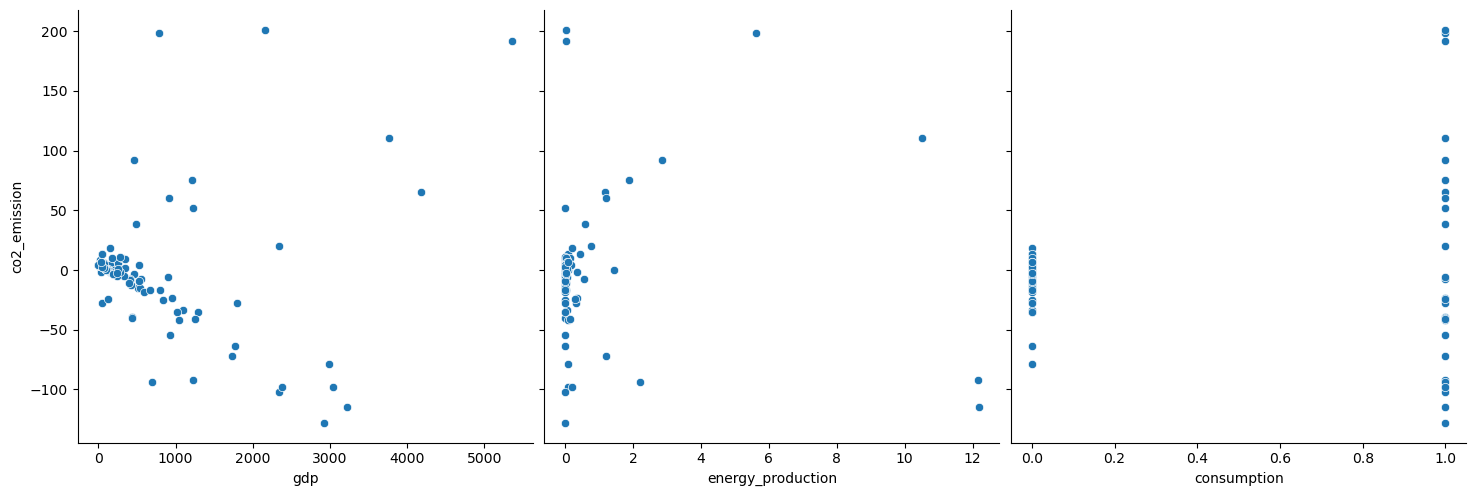

In [92]:
df_1['co2_emission'] = res.resid

sns.pairplot(df_1, y_vars = 'co2_emission', x_vars = ['gdp', 'energy_production', 'consumption'], size = 5, diag_kind=None)

С фиктивными переменными 1 способ (тест Уайта)

In [93]:
from statsmodels. stats.diagnostic import het_white
import statsmodels.api as sm

In [94]:
y = df_1['co2_emission']
x = df_1[['gdp', 'energy_production', 'consumption']]
x = sm.add_constant (x)
model = sm. OLS (y, x). fit ()

In [95]:
white_test = het_white(model.resid , model. model.exog )
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, white_test)))

{'Test Statistic': 114.41759173926097, 'Test Statistic p-value': 4.696117898410845e-21, 'F-Statistic': 33.735771674415716, 'F-Test p-value': 2.8884698822938627e-32}


H0: присутствует гомоскедастичность (остатки равномерно разбросаны)

H1: присутствует гетероскедастичность (остатки разбросаны неравномерно)

Так как значение p-value < 0.05, отвергаем нулевую гипотезу => гетероскедастичность в данных есть

2 способ (тест Бреуша-Пагана)

In [96]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

names = ['Lagrange multiplier statistic', 'p-value',
 'f-value', 'f p-value']
test = sms.het_breuschpagan(model.resid, model.model.exog)

lzip(names, test)

[('Lagrange multiplier statistic', 89.62694338691844),
 ('p-value', 2.634406907299848e-19),
 ('f-value', 54.864257954201896),
 ('f p-value', 1.6033910807753296e-25)]

H0: присутствует гомоскедастичность (остатки равномерно разбросаны)

H1: присутствует гетероскедастичность (остатки разбросаны неравномерно)

Статистика множителя Лагранжа для теста равна 89.63, а значение p-value < 0.05, отвергаем нулевую гипотезу => гетероскедастичность в данных есть

Без фиктивных переменных 1 способ (тест Уайта)

In [97]:
y = df_1['co2_emission']
x = df_1[['gdp', 'energy_production']]
x = sm.add_constant (x)
model = sm. OLS (y, x). fit ()

In [98]:
white_test = het_white(model.resid , model. model.exog )
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, white_test)))

{'Test Statistic': 109.81251889395705, 'Test Statistic p-value': 4.488701813704944e-22, 'F-Statistic': 49.703746213909014, 'F-Test p-value': 1.617697204820335e-32}


H0: присутствует гомоскедастичность (остатки равномерно разбросаны)

H1: присутствует гетероскедастичность (остатки разбросаны неравномерно)

Так как значение p-value < 0.05, отвергаем нулевую гипотезу => гетероскедастичность в данных есть

2 способ (тест Бреуша-Пагана)

In [99]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

names = ['Lagrange multiplier statistic', 'p-value',
 'f-value', 'f p-value']
test = sms.het_breuschpagan(model.resid, model.model.exog)

lzip(names, test)

[('Lagrange multiplier statistic', 84.60258220037457),
 ('p-value', 4.2538551534322517e-19),
 ('f-value', 74.4426093451502),
 ('f p-value', 1.435329882643449e-24)]

H0: присутствует гомоскедастичность (остатки равномерно разбросаны)

H1: присутствует гетероскедастичность (остатки разбросаны неравномерно)

Статистика множителя Лагранжа для теста равна 84.60, а p-value < 0.05, можем отвергнуть нулевую гипотезу, то есть по этому тесту гетероскедастичность в данных есть

### 11. Выбрать наилучшее уравнение регрессии. Выполнить точечный и интервальный прогноз.

### Без фиктивных переменнных
Y = -2.4821 + 0.0520*X1 + 16.0576*X2

Все коэффициенты значимы, уравнение значимо

R-squared:0.663

R скорр: 0.660

### С фиктивными переменнными 
Y = -4.3537 + 0.0387X1 + 13.4945X2 + 52.0588Z

Все коэффициенты значимы, уравнение значимо

R-squared: 0.703

R скорр: 0.698

### Берем модель с фиктивной переменной

### Точечный прогноз

In [100]:
df_1

,country,co2_emission,gdp,energy_production,consumption
54061,Afghanistan,5.461478,79.45460,0.042336,0
54067,Albania,3.076489,38.26840,0.000089,0
54073,Algeria,-15.105746,509.06600,0.000000,0
54085,Angola,-3.144042,193.82600,0.000000,0
54097,Antigua and Barbuda,4.271329,2.12893,0.000000,0
...,...,...,...,...,...
55399,Venezuela,-3.036668,190.14720,0.012014,0
55405,Vietnam,60.643214,915.50400,1.202316,1
55423,Yemen,2.521627,53.08380,0.000000,0
55429,Zambia,-2.645024,247.18190,0.024538,0


Во Вьетнаме выбросы углерода в 2019 году составили 60.64 миллионов тонн. ВВП составил 915.504 млрд долларов, а производство угля - 1.202 кв. БТЕ, причем потребление больше среднего по миру

In [101]:
-4.3537 + 0.0387 * 915.504 + 13.4945 * 1.202316 + 52.0588 * 1

99.359758062

Таким образом, получившиеся значение (99.36 миллионов тонн) в целом приблизительно равно фактическому

### Интервальный прогноз

In [102]:
df_1['prediction'] = -4.3537 + 0.0387 * df_1['gdp'] + 13.4945 * df_1['energy_production'] + 52.0588 * df_1['consumption']

C:\Users\Elizaveta\AppData\Local\Temp\ipykernel_2024\1109326447.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['prediction'] = -4.3537 + 0.0387 * df_1['gdp'] + 13.4945 * df_1['energy_production'] + 52.0588 * df_1['consumption']


In [103]:
df_1

,country,co2_emission,gdp,energy_production,consumption,prediction
54061,Afghanistan,5.461478,79.45460,0.042336,0,-0.707508
54067,Albania,3.076489,38.26840,0.000089,0,-2.871512
54073,Algeria,-15.105746,509.06600,0.000000,0,15.347154
54085,Angola,-3.144042,193.82600,0.000000,0,3.147366
54097,Antigua and Barbuda,4.271329,2.12893,0.000000,0,-4.271310
...,...,...,...,...,...,...
55399,Venezuela,-3.036668,190.14720,0.012014,0,3.167114
55405,Vietnam,60.643214,915.50400,1.202316,1,99.359752
55423,Yemen,2.521627,53.08380,0.000000,0,-2.299357
55429,Zambia,-2.645024,247.18190,0.024538,0,5.543370


In [104]:
se = np.std(df_1['prediction'])
se

57.53390899446928

In [105]:
t = 1.9719

t табл = 1.9719

se(y пр) = 57.53

Нижняя граница

In [106]:
print('Нижняя граница: ', 60.64 - t * se)
print('Верхняя граница: ',  60.64 + t * se)

Нижняя граница:  -52.81111514619397
Верхняя граница:  174.09111514619397


Согласно интервальному прогнозу объем выбросов CO2 для Вьетнама может лежать в пределах от 0 (так как отрицательным не может быть) до 174.09 млн. тонн.
